In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [62]:

DATASET_PATH = "C:\\Users\\ASLAM\\\Desktop\\Bootcamp\\Day9\\PetImages\\Dog"  

image_filename = os.listdir(DATASET_PATH)[0] 
image_path = os.path.join(DATASET_PATH, image_filename)


image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (64, 64))

image_resized = image_resized / 255.0  

image_tensor = image_resized.reshape(1, 64, 64, 1)

In [63]:

filter_values = np.array([
    [[1, 0, 0], 
     [0, 1, 0], 
     [0, 0, 1]]
], dtype=np.float32)

conv_filter = filter_values.reshape(3, 3, 1, 1)


In [64]:
conv_filter_tensor = tf.constant(conv_filter, dtype=tf.float32)

feature_map = tf.nn.conv2d(image_tensor, conv_filter_tensor, strides=[1, 1, 1, 1], padding="VALID")

feature_map_np = feature_map.numpy().squeeze()

In [65]:
feature_map_relu = tf.nn.relu(feature_map)


In [66]:
feature_map_reshaped = feature_map_relu.numpy().reshape(1, 62, 62, 1)

pooled_feature_map = tf.nn.max_pool(feature_map_reshaped, ksize=2, strides=2, padding="VALID")

pooled_feature_map_np = pooled_feature_map.numpy().squeeze()



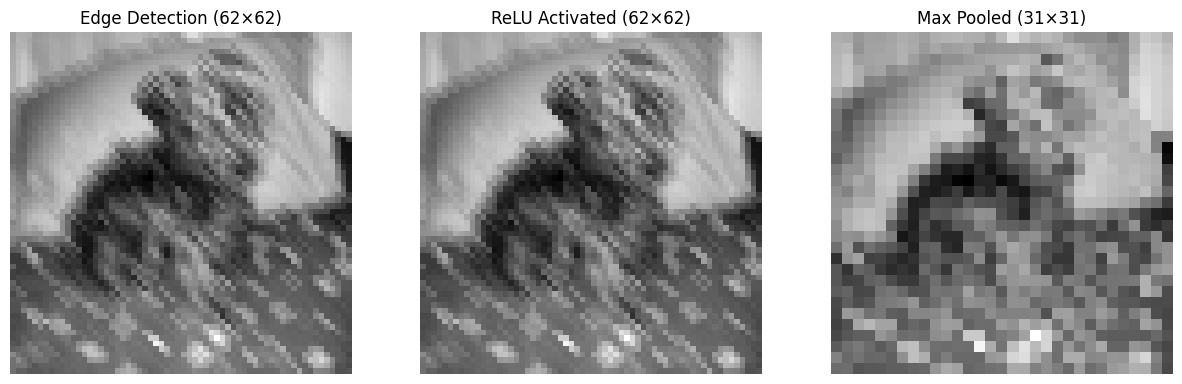

In [67]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(feature_map_np, cmap="gray")
plt.title("Edge Detection (62×62)")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(feature_map_relu.numpy().squeeze(), cmap="gray")
plt.title("ReLU Activated (62×62)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(pooled_feature_map_np, cmap="gray")
plt.title("Max Pooled (31×31)")
plt.axis("off")

plt.show()
